In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Question 2

Load the image and templates

(367, 512)


(-0.5, 511.5, 366.5, -0.5)

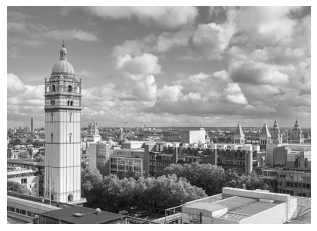

In [ ]:
scene = cv2.imread('/content/sample_data/Tutorial3_Data/Scene.png', 0)
temp = cv2.imread('/content/sample_data/Tutorial3_Data/Template.png', 0)
temp_small = cv2.imread('/content/sample_data/Tutorial3_Data/Template_small.png', 0)
plt.imshow(scene, cmap='gray')
print(scene.shape)
plt.axis('off')

(-0.5, 62.5, 131.5, -0.5)

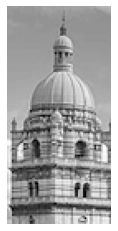

In [ ]:
plt.imshow(temp, cmap='gray')
plt.axis('off')

(-0.5, 31.5, 65.5, -0.5)

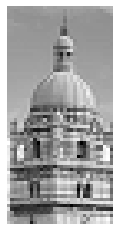

In [ ]:
plt.imshow(temp_small, cmap='gray')
plt.axis('off')

The normalized cross-correlation function

In [ ]:
def NCC(img, temp):
    H, W = img.shape
    h, w = temp.shape
    score_map = np.zeros((H-h+1, W-w+1))
    mu_temp = np.mean(temp)
    std_temp = np.std(temp)
    normal_temp = (temp - mu_temp)/std_temp
    for i in range(H-h+1):
        for j in range(W-w+1):
            img_in_temp = img[i:i+h, j:j+w]
            mu_img = np.mean(img_in_temp)
            std_img = np.std(img_in_temp)
            normal_img = (img_in_temp - mu_img)/std_img
            score_map[i,j] = np.sum(normal_img * normal_temp)
    return score_map


You also can plot the score map via matplotlib package to visualize the matching position.

In [ ]:
score_map = NCC(scene, temp)

(-0.5, 511.5, 366.5, -0.5)

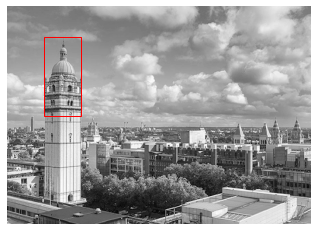

In [ ]:
h, w = temp.shape
result = np.where(score_map == np.max(score_map))
rect = patches.Rectangle((result[1],result[0]),w,h, edgecolor='r', facecolor="none")
figure, ax = plt.subplots(1)
ax.imshow(scene, cmap='gray')
ax.add_patch(rect)
plt.axis('off')

In [ ]:
score_map = NCC(scene, temp_small)

(-0.5, 511.5, 366.5, -0.5)

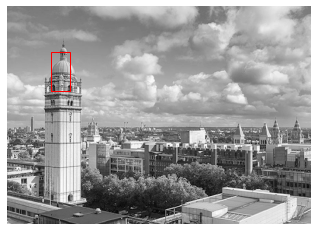

In [ ]:
h, w = temp_small.shape
result = np.where(score_map == np.max(score_map))
rect = patches.Rectangle((result[1],result[0]),w,h, edgecolor='r', facecolor="none")
figure, ax = plt.subplots(1)
ax.imshow(scene, cmap='gray')
ax.add_patch(rect)
plt.axis('off')

# Question 2

Let's start by creating the two images, knowing that `black = 0` and `white = 1`.

The first image, on the left, looks like a checkerboard pattern.
Is there a smart way of creating a checkerboard pattern? [Answer](https://stackoverflow.com/questions/2169478/how-to-make-a-checkerboard-in-numpy)

In [ ]:
import numpy as np

im_1_shape = (5, 5) # We want (5 rows, 5 columns)

"""
# Step-by-step explanation (uncomment the line above)

print("When we create a 5x5 matrix these will be the indices:")
print(np.indices(im_1_shape))
print("\nNow we can sum them into a single matrix:")
print(np.indices(im_1_shape).sum(axis=0))
print("\nThen we can check if the each number is even or odd:")
#"""
im_1 = np.indices(im_1_shape).sum(axis=0) % 2
print(im_1)

[[0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]]


Let's create `im_2` by hand.

In [ ]:
im_2 = np.array([[0, 1, 1, 0, 0],
                 [0, 0, 1, 1, 0],
                 [1, 0, 0, 1, 1],
                 [1, 1, 0, 0, 1],
                 [0, 1, 1, 0, 0]])
print(im_2)

[[0 1 1 0 0]
 [0 0 1 1 0]
 [1 0 0 1 1]
 [1 1 0 0 1]
 [0 1 1 0 0]]


Both textures (`im_1` and `im_2`), have 12 white and 13 black pixels. So their histogram would be the same. Is there another way besides using histograms to compare textures? Is there was a way to use the spatial distribution of the pixels?

Yes, an alternative is to process the texture using co-occurence matrices.

### What are co-occurence matrices?

It's the computation of how often **pairs** of pixels with a specific **value** and **offset** occur in the image in a given **direction**. In this exercise, they ask to calculate over 4 directions and with offset of 1 and 2 pixels respectively. So we will have all the possible scenarios:

1.   **direction** = horizontal, **offset** = 1
2.   **direction** = horizontal, **offset** = 2
3.   **direction** = vertical  , **offset** = 1
4.   **direction** = vertical  , **offset** = 2
5.   **direction** = diagonal_1, **offset** = 1
6.   **direction** = diagonal_1, **offset** = 2
7.   **direction** = diagonal_2, **offset** = 1
8.   **direction** = diagonal_2, **offset** = 2


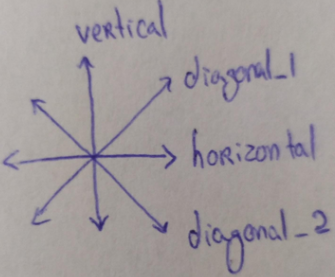

The co-occurence matrix has a size $N \times N$, where $N$ is the number of gray values. Since we only have two intensity values $I_0 = 0$ and $I_1 = 1$, our co-occurence matrices will look like:

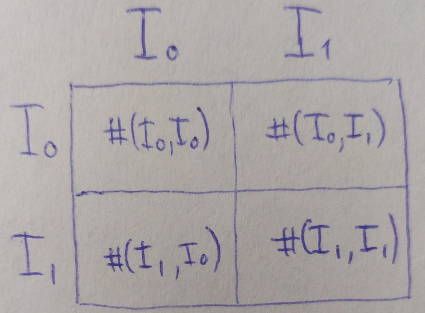

## `im_1`, and scenario 1 (**direction** = horizontal, **offset** = 1).

In [ ]:
print(im_1)

[[0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]]


Given that **direction** = horizontal, **offset** = 1.

$\#(I_0, I_0) = \# (0, 0)$, we want to count how many times we can find a 0 next to another 0, horizontally, with a distance of 1 (=**offset**) pixel. In `im_1` we cannot find any, so,  $\#(0, 0) = 0$. The same logic applies for $\#(I_1, I_1) = \# (1, 1) = 0$.

For the other positions of the co-occurence matrix, $\#(I_0, I_1)$ and $\#(I_1, I_0)$ we will count 20 for each. Below you can see an illustration of the counting (Note that we count both from left-to-right and right-to-left):

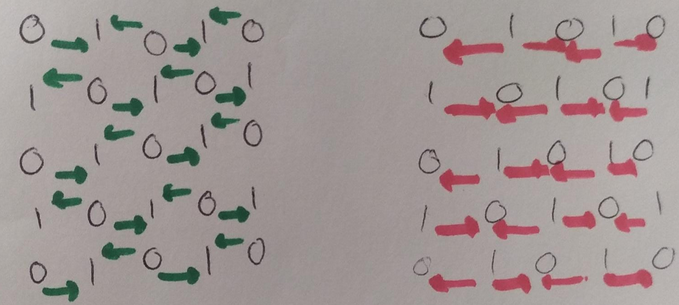

So the result for `im_1` and scenario 1 is:

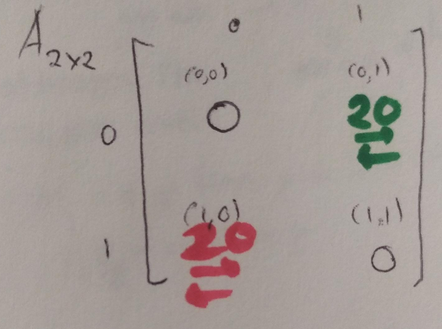

Now, let's see an example of a different direction and different offset.

## `im_1`, and scenario 6 (**direction** = diagonal_1, **offset** = 2).

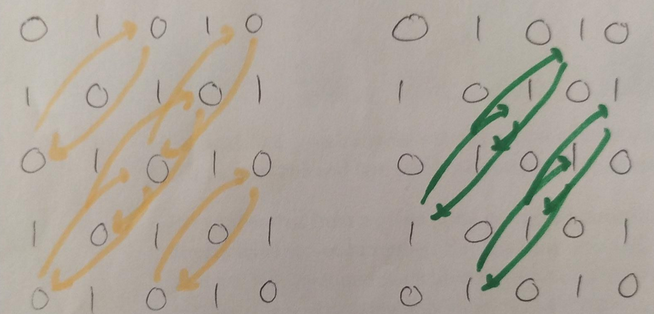

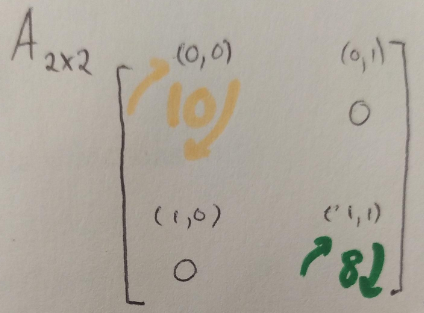

Now can you think of an way to do this by code?

## Characteristic vectors

Scenarios:

1.   **direction** = horizontal, **offset** = 1
2.   **direction** = horizontal, **offset** = 2
3.   **direction** = vertical  , **offset** = 1
4.   **direction** = vertical  , **offset** = 2
5.   **direction** = diagonal_1, **offset** = 1
6.   **direction** = diagonal_1, **offset** = 2
7.   **direction** = diagonal_2, **offset** = 1
8.   **direction** = diagonal_2, **offset** = 2

We will have characteristic vectors for each image, in the form:

[(scenario 1.), (scenario 2.), (scenario 3.), (scenario 4.), (scenario 5.), (scenario 6.), (scenario 7.), (scenario 8.)]

For example, for `im_1` and `scenario 1.` we had:

\begin{bmatrix}
0 & 20 \\
20 & 0 
\end{bmatrix}

and if we normalize we obtain:

\begin{bmatrix}
0 & 0.5 \\
0.5 & 0 
\end{bmatrix}

So for for `im_1` and `scenario_1`the

(a) Energy value  = $(0.5)^2 + (0.5)^2 = 0.5$

(b) Entropy value = $-(0.5\times log_2(0.5) + 0.5\times log_2(0.5)) = 1.0$.

(c) Maximum = $0.5$

If we apply the same logic for the remaining scenarios we obtain the `im_1` characteristic vectors for (a) Energy, (b) Entropy and (c) Maximum.

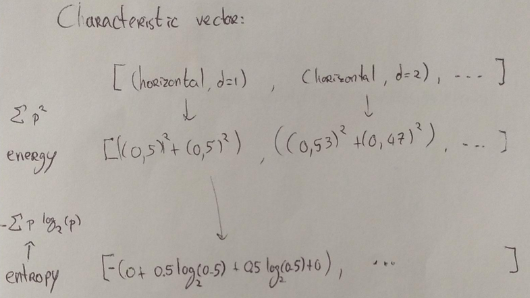

Then do the same for `im_2`.